In [1]:
import numpy
import matplotlib.pyplot as plt
import cv2
import pandas
import os
import random
# keras lib
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, LSTM
import tensorflow
tensorflow.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Train image model.

In [2]:
# get images and their labels.
data_id_label = pandas.read_csv('devset_images_gt.csv')
list_id = list(data_id_label.id)
list_label = list(data_id_label.label)

image_path = 'C:/Users/ADMIN/Desktop/document/projects/TDH-prj/devset_images/devset_images/'
count = 0
list_file = os.listdir(image_path)
dir_data = []
label_data = []
for i in range(len(list_id)):
    val = list_id[i]
    if (str(val) + '.jpg') in list_file:
        dir_data.append(image_path + (str(val) + '.jpg'))
        label_data.append(list_label[i])
#check data
# for val in dir_data:
#     cv2.imread(val)

In [3]:
#check.
dir_data[1], label_data[1]

('C:/Users/ADMIN/Desktop/document/projects/TDH-prj/devset_images/devset_images/4896119055.jpg',
 0)

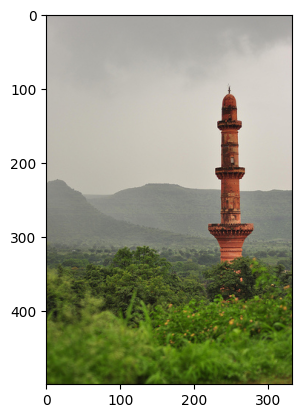

'image label:0'

In [4]:
#check image.
img = cv2.imread(dir_data[1])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
"image label:" + str(label_data[1])

In [5]:
#split train, test.
ratio = 8/10
num = int(len(dir_data)*ratio)
train_dir = dir_data[:num]
train_label = label_data[:num]
test_dir = dir_data[num:]
test_label = label_data[num:]

data = []
for i in range(len(train_dir)):
    data.append([train_dir[i], train_label[i]])
len(train_dir),len(test_dir),len(data)

(4212, 1053, 4212)

In [6]:
def load_image(batch_size, size):
    list_image = []
    list_label = []
    sm_data = random.choices(data,k = batch_size)
    for i in range(len(sm_data)):
        img = cv2.imread(sm_data[i][0])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, size)
        lb = sm_data[i][1]
        list_image.append(img)
        list_label.append(lb)
    return numpy.array(list_image), numpy.array(list_label)

label: 1


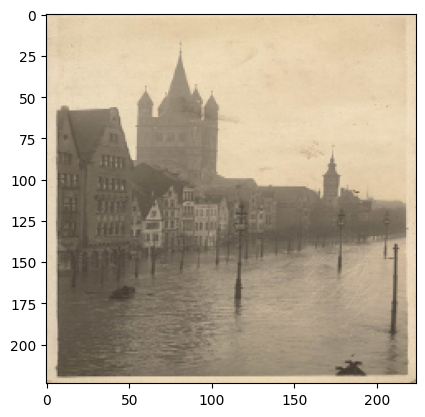

label: 0


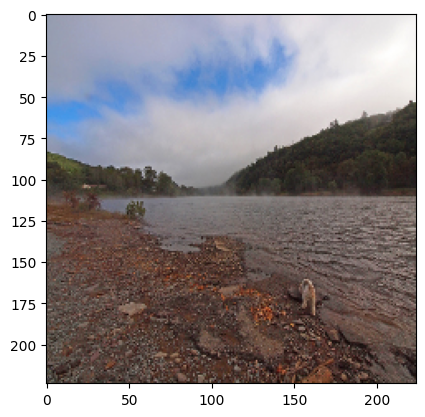

In [7]:
img, lb = load_image(2,(224,224))
for i in range(len(img)):
    print('label:',lb[i])
    plt.imshow(img[i])
    plt.show()

In [8]:
model = keras.models.load_model('image.h5')
model.summary()

Model: "res"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 49,377,026
Trainable params: 49,323,906
Non-train

In [9]:
# from tqdm.notebook import tqdm
# size = (224,224)
# batch_size = 100
# epochs = 200
# for epoch in tqdm(range(epochs)):
#     #print('real epoch: '+str(epoch)+'/'+str(epochs))
#     X, y = load_image(batch_size=batch_size, size=size)
#     model.fit(X, y, epochs = 1, batch_size= 5, verbose=False)
#     model.save('image.h5')

In [10]:
# from tqdm.notebook import tqdm
# model = keras.models.load_model('image.h5')
# count = 0
# for i in tqdm(range(len(test_dir))):
#     img = cv2.imread(test_dir[i])
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = cv2.resize(img, size)
#     lb = test_label[i]
#     if numpy.argmax(model.predict(numpy.array([img]),verbose=False)[0]) == lb:
#         count += 1
# print(count/len(test_dir)*100,'%')

In [11]:
# visual check
# for i in range(20):
#     img = cv2.imread(test_dir[i])
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = cv2.resize(img, size)
#     lb = test_label[i]
#     print('pred:',numpy.argmax(model.predict(numpy.array([img]),verbose=False)[0]),'|real:', lb)
#     plt.imshow(img)
#     plt.show()
#     print('==============================================')

# Text model.

In [12]:
data = pandas.read_csv('test.csv')
data = data.fillna('-1')
title = data.title
des = data.description
tag = data.user_tags

In [16]:
def encode(text, keywords):
    text = str(text).split()
    matrix = [0 for val in keywords]
    for i in range(len(matrix)):
        matrix[i] = text.count(keywords[i])
    return numpy.array(matrix)

def vector(tt, des, tag, keywords):
    matrix = [[0 for val in keywords] for _ in tt]
    matrix = numpy.array(matrix)
    for i in range(len(matrix)):
        matrix[i] = encode(tt[i], keywords) + encode(des[i], keywords) + encode(tag[i], keywords)
    return matrix

In [18]:
keywords = ['flood','floods','flooding','rain','raining','wet','rain','flooded']
features = vector(title, des, tag, keywords)

In [21]:
image_id = data.image_id
len(image_id)

1320

In [24]:
trains = []
labels = []
for i in range(len(image_id)):
    if image_id[i] in list_id:
        trains.append(features[i])
        labels.append(list_label[i])
len(labels)

0

In [25]:
len(trains)

0

In [30]:
image_id[0] in list_id

False